## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from PIL import *
import graphviz
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

c:\users\vnrak\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\vnrak\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Loading Datasets

In [2]:
data= pd.read_csv('bank.csv',encoding="ISO-8859-1")
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4237 non-null float64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4168 non-null float64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4251 non-null float64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 600.5+ KB


In [4]:
data.isna().any()

age           True
job          False
marital      False
education    False
default      False
balance       True
housing      False
loan         False
contact      False
day          False
month        False
duration      True
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
#get the median of Age and replace it NaN
data['age'].fillna(data['age'].median(), inplace = True) 

In [6]:
#get the mean of duration and replace it NaN
data['duration'].fillna(data['duration'].mean(), inplace = True) 

In [7]:
#get the mean of balance and replace it NaN
data['balance'].fillna(data['balance'].mean(), inplace = True) 

In [8]:
#data cleanup
cleanup = {'default': {'yes': 1, 'no': 0}, #Encoding Yes as 1 and No as 0
           'y': {'yes' : 1, 'no': 0},
           'marital': {'single': 0, 'married': 1, 'divorced': 2},
           'education': {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3},
           'housing': {'yes': 1, 'no': 0},
           'loan' : {'yes': 1, 'no': 0},
            'contact' : {'unknown': 0, 'cellular': 1, 'telephone': 2},
          'poutcome' : {'unknown' : 0, 'success' : 1, 'failure' : 2, 'other' : 3}}
data.replace(cleanup, inplace = True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,1,1,0,1787.000000,0,0,1,19,oct,79.000000,1,-1,0,0,0
1,33.0,services,1,2,0,4789.000000,1,1,1,11,may,220.000000,1,339,4,2,0
2,35.0,management,0,3,0,1375.929223,1,0,1,16,apr,185.000000,1,330,1,2,0
3,30.0,management,1,3,0,1476.000000,1,1,0,3,jun,261.430722,4,-1,0,0,0
4,59.0,blue-collar,1,2,0,0.000000,1,0,0,5,may,226.000000,1,-1,0,0,0


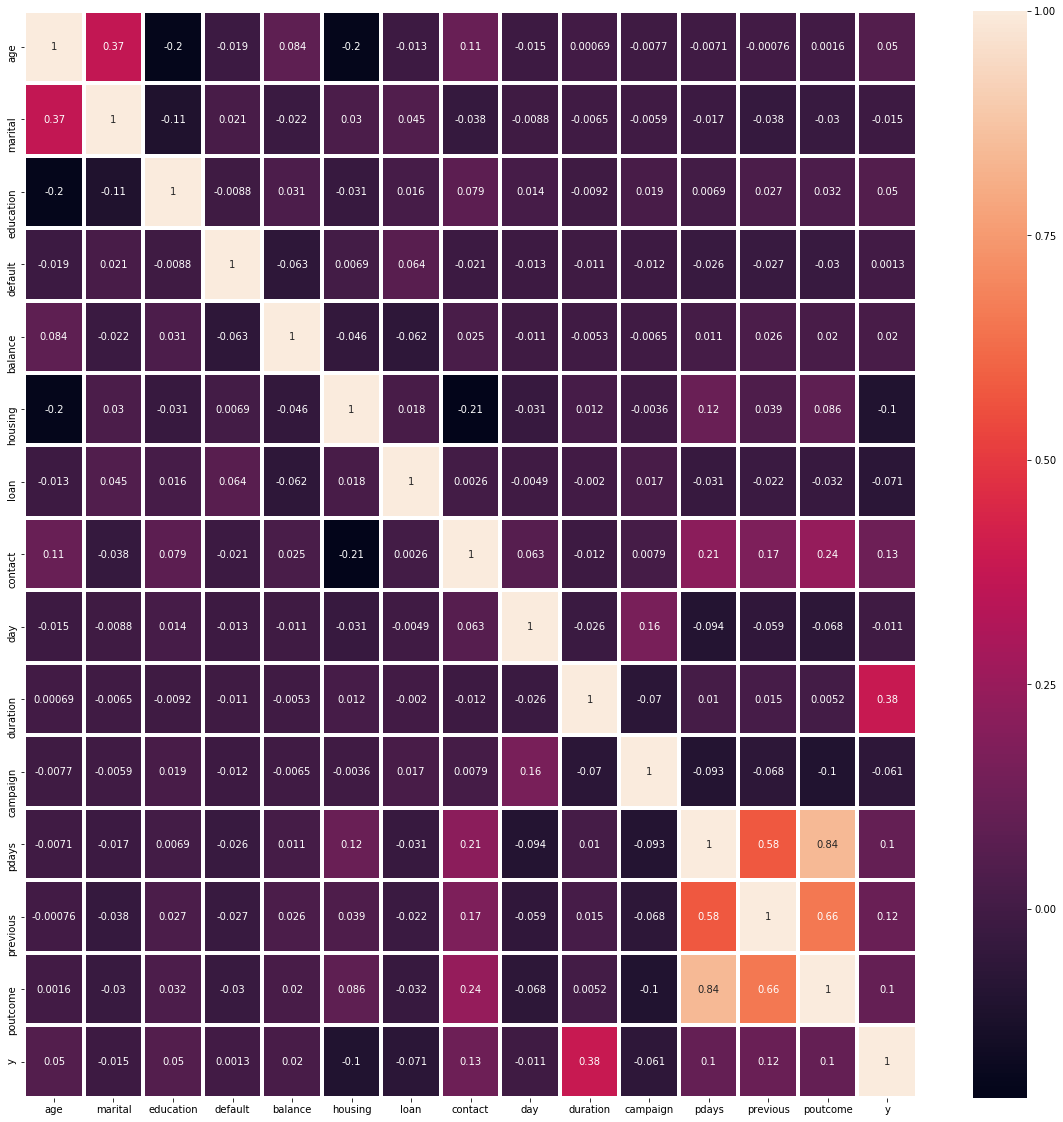

In [9]:
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

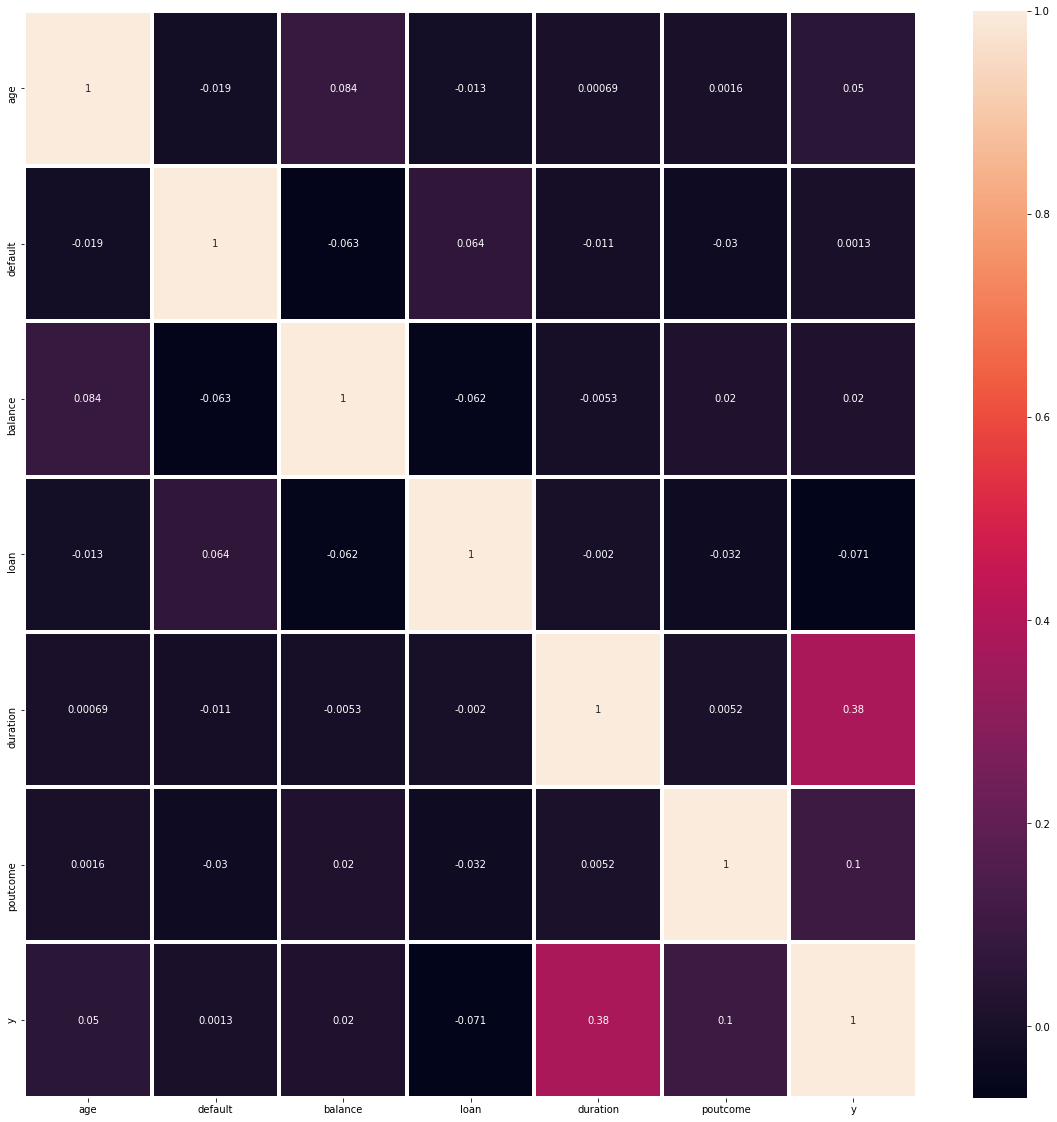

In [10]:
data.drop(['job','month','day','marital','housing','contact','education','campaign','pdays','previous'],axis=1,inplace=True)
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

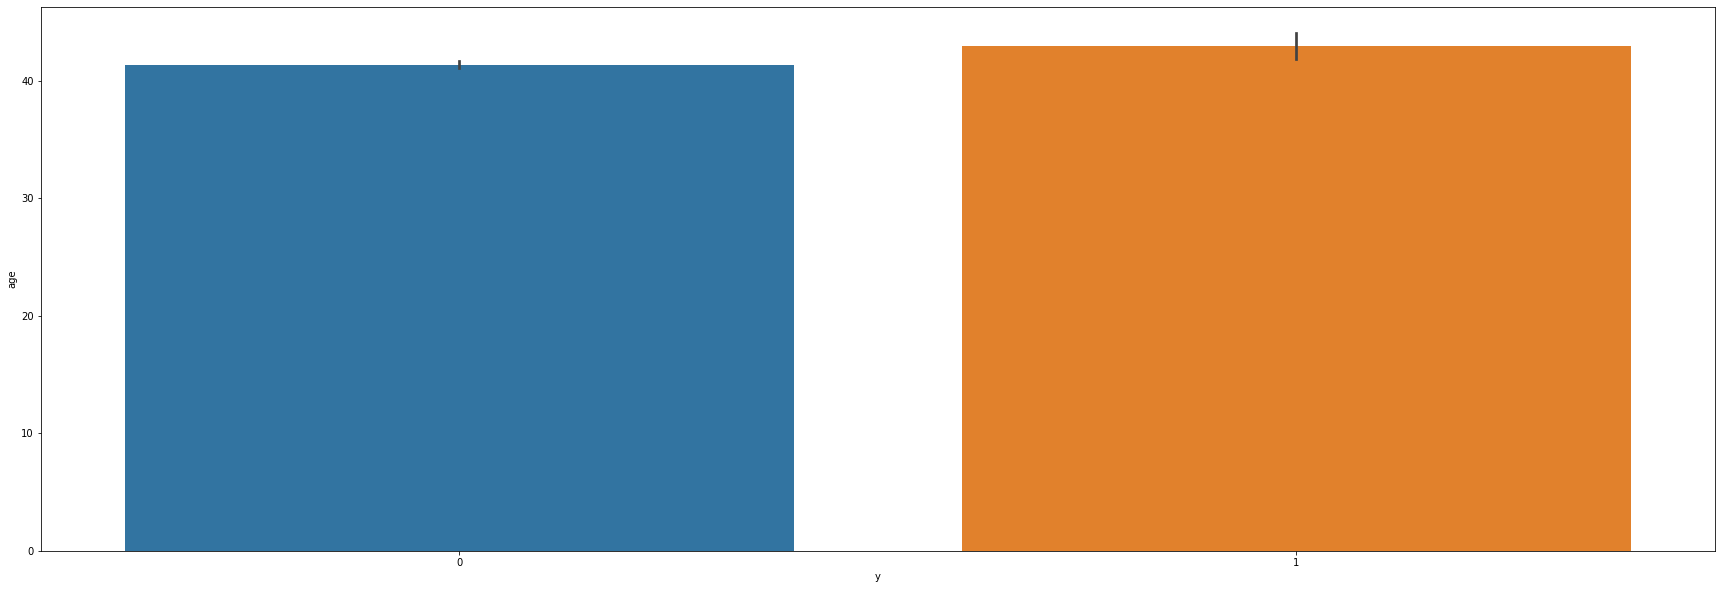

In [11]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='age',data= data,estimator=np.mean)

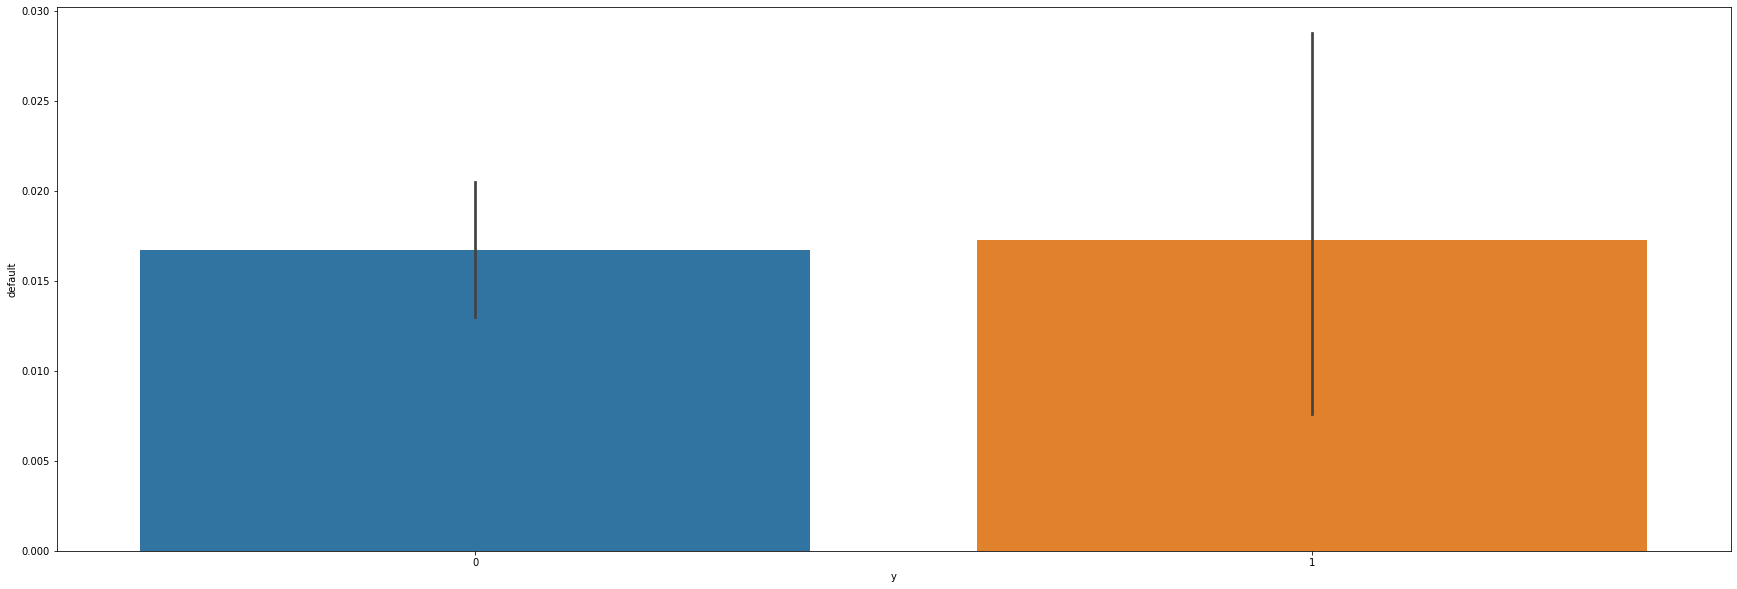

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='default',data= data,estimator=np.mean)

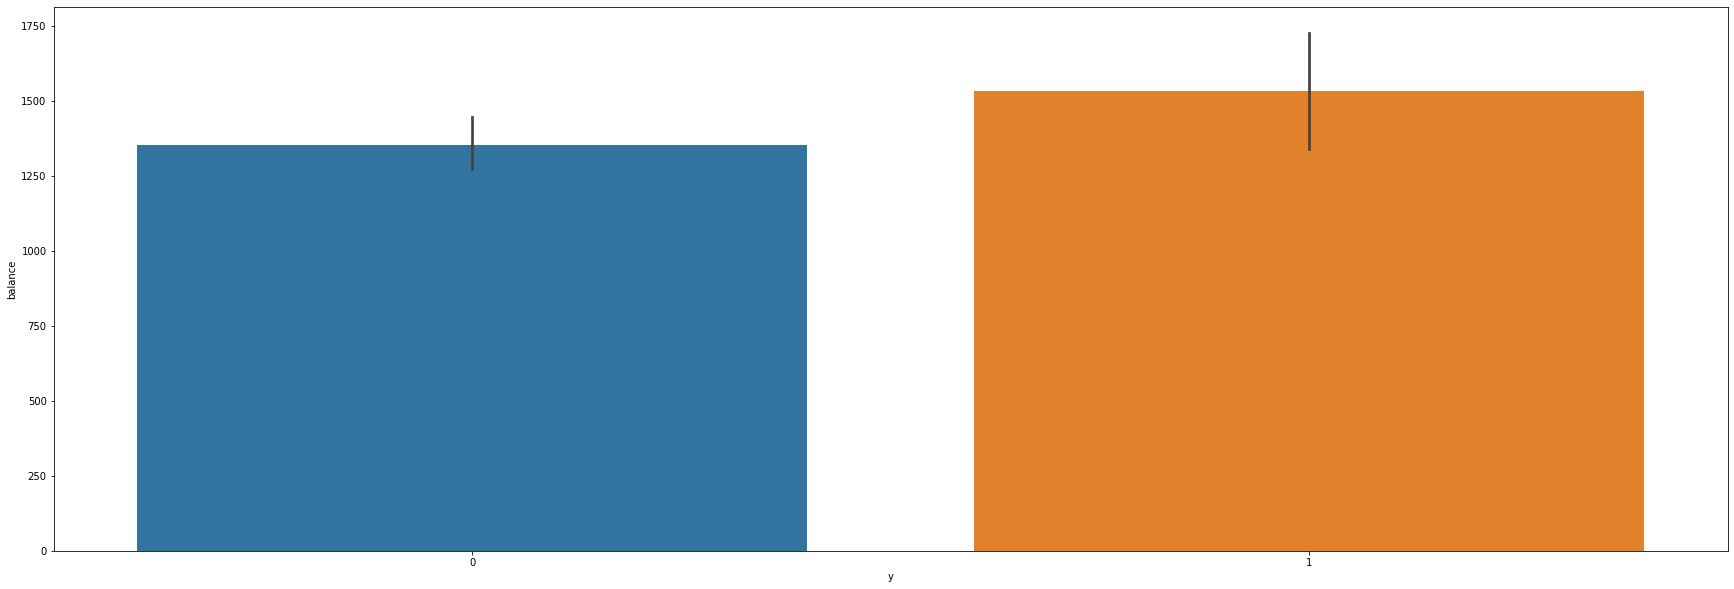

In [13]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='balance',data= data,estimator=np.mean)

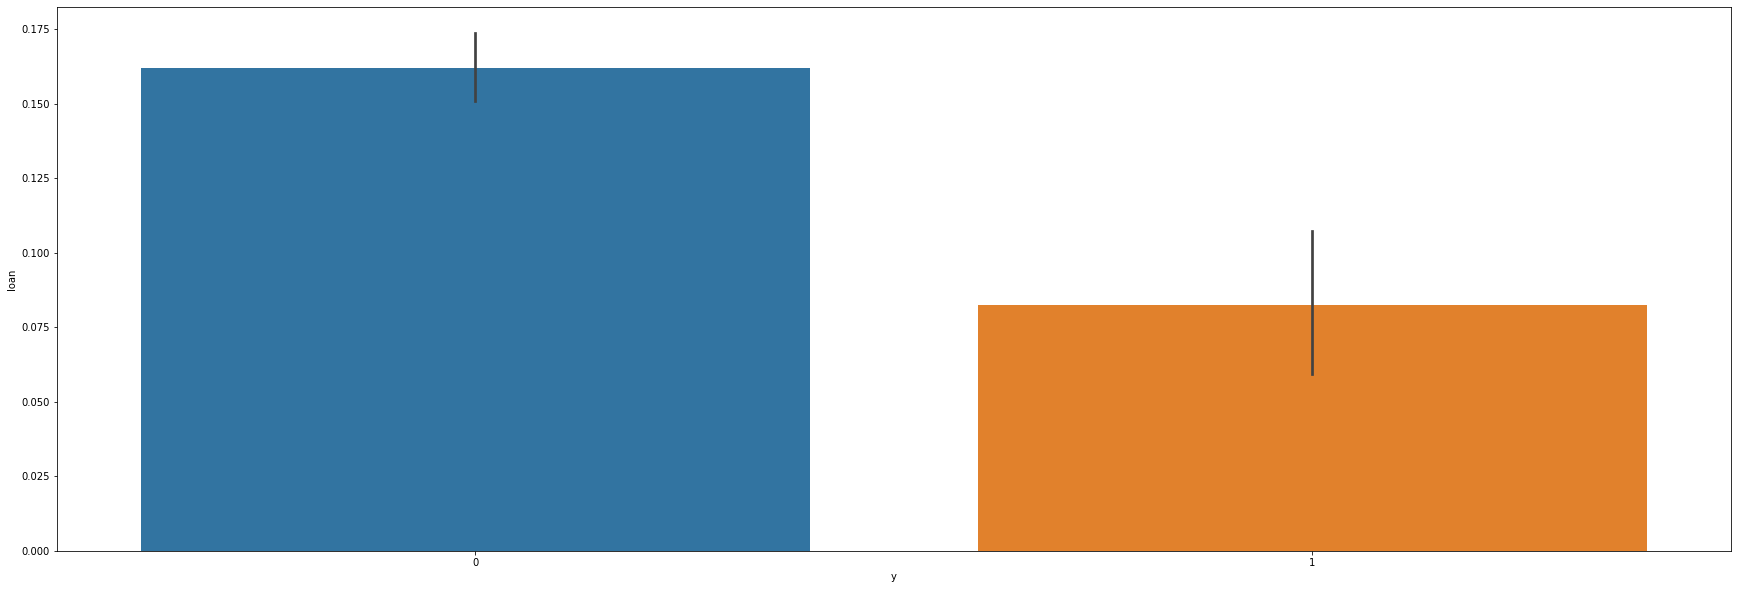

In [14]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='loan',data= data,estimator=np.mean)

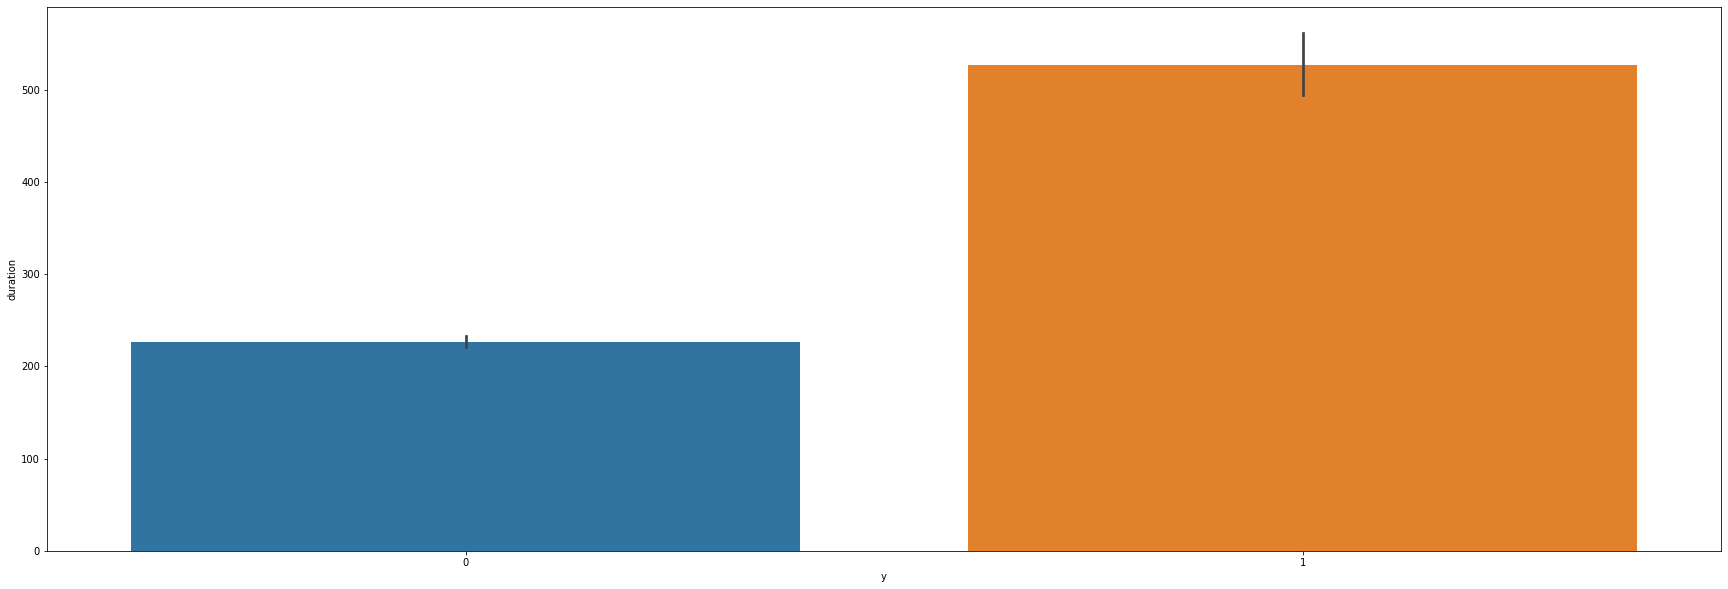

In [15]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='duration',data= data,estimator=np.mean)

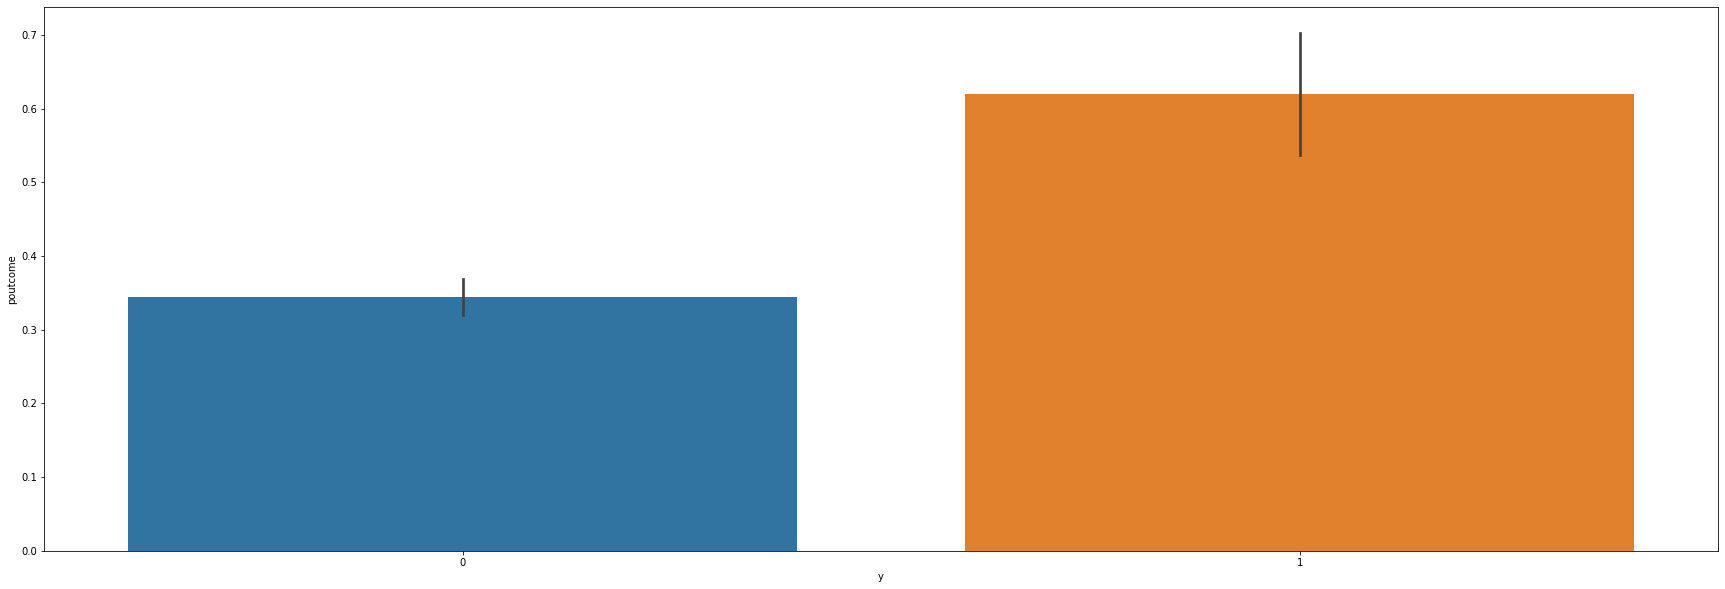

In [16]:
plt.figure(figsize=(30,10))
sns.barplot(x='y',y='poutcome',data= data,estimator=np.mean)

### Removing Duplicated Rows

In [17]:
data=data[data.duplicated(subset=None, keep='first')==False]

# Classification Algorithms

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [19]:
x = data.drop('y',axis=1)
y = data['y']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

## Voting

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l1',C=100)
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=10,probability=True)
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf',C=10,gamma=0.1,probability=True)
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10,probability=True)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(random_state=0,max_depth=2,learning_rate=0.01)

### Hard Voting

In [21]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('knn',knn),('logistic',logistic),('tree',tree),('rnd_clf',rnd_clf),('gbc_clf',gbc_clf)]
voting1 = VotingClassifier(estimator1,voting='hard')
voting1.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (knn,logistic,tree,rnd_clf,gbc_clf,voting1):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.8784838350055741
LogisticRegression 0.887402452619844
DecisionTreeClassifier 0.8963210702341137
RandomForestClassifier 0.8818283166109253
GradientBoostingClassifier 0.8862876254180602
VotingClassifier 0.8818283166109253


### Soft Voting

In [22]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('svc_linear',svc_linear),('svc_rbf',svc_rbf),('svc_poly',svc_poly)]
voting2 = VotingClassifier(estimator1,voting='soft')
voting2.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (svc_linear,svc_rbf,svc_poly,voting2):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8862876254180602
SVC 0.8862876254180602
SVC 0.887402452619844
VotingClassifier 0.8862876254180602


# Bagging

## 1. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('y',axis=1)
y=data['y']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [24]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9079
Accuracy on test set: 0.8986


In [25]:
#Bagging
from sklearn.ensemble import BaggingClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)
bag_dtree = BaggingClassifier(dtree,n_estimators=500,max_samples=100,random_state=0)
bag_dtree.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_dtree.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_dtree.score(x_test, y_test)))

Train score: 0.8932
Test score: 0.8841


## 2. Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
x= data.drop('y',axis=1)
y=data['y']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [27]:
logreg = LogisticRegression(penalty='l1', C=100)
logreg.fit(x_train, y_train)
print('Train score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(logreg.score(x_test, y_test)))

Train score: 0.8890
Test score: 0.8874


In [28]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1', C=100)
logreg.fit(x_train, y_train)
bag_log = BaggingClassifier(logreg,n_estimators=500,max_samples=100,random_state=0)
bag_log.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_log.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_log.score(x_test, y_test)))

Train score: 0.8915
Test score: 0.8841


# Pasting

## 1. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('y',axis=1)
y=data['y']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [30]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9079
Accuracy on test set: 0.8986


In [31]:
#Pasting
from sklearn.ensemble import BaggingClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)
bag_dtree = BaggingClassifier(dtree,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_dtree.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_dtree.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_dtree.score(x_test, y_test)))

Train score: 0.8893
Test score: 0.8896


## 2. SVC with Linear Kernel

In [32]:
from sklearn.model_selection import train_test_split
x = data.drop('y',axis=1)
y = data['y']

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train_org)
x_test = scale.transform(x_test_org)

In [33]:
svc_lin = SVC(C=10,kernel='linear')
svc_lin.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_lin.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_lin.score(x_test, y_test)))

Train score: 0.8831
Test score: 0.8863


In [34]:
#Pasting
from sklearn.ensemble import BaggingClassifier
svc_lin = SVC(kernel='linear',C=10)
bag_svc_lin = BaggingClassifier(svc_lin,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svc_lin.fit(x_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_lin.score(x_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_lin.score(x_test, y_test)))

Train score: 0.8831
Test score: 0.8863


# AdaBoosting

## 1. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('y',axis=1)
y=data['y']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [36]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9079
Accuracy on test set: 0.8986


In [37]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)
ada_dtree = AdaBoostClassifier(dtree,n_estimators=200,learning_rate=0.5,algorithm='SAMME')
ada_dtree.fit(x_train,y_train)
print('Train score: {:.4f}'.format(ada_dtree.score(x_train, y_train)))
print('Test score: {:.4f}'.format(ada_dtree.score(x_test, y_test)))

Train score: 0.9102
Test score: 0.8896


## 2. SVC with Poly Kernel

In [38]:
from sklearn.model_selection import train_test_split
x = data.drop('y',axis=1)
y = data['y']

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train_org)
x_test = scale.transform(x_test_org)

In [39]:
svc_poly = SVC(C=10, kernel='poly', gamma=10)
svc_poly.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_poly.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_poly.score(x_test, y_test)))

Train score: 0.8876
Test score: 0.8874


In [40]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
svc_poly = SVC(kernel='poly',C=10,gamma=10)
ada_svc_poly = AdaBoostClassifier(svc_poly,n_estimators=200,learning_rate=0.5,algorithm='SAMME')
ada_svc_poly.fit(x_train,y_train)
print('Train score: {:.4f}'.format(ada_svc_poly.score(x_train, y_train)))
print('Test score: {:.4f}'.format(ada_svc_poly.score(x_test, y_test)))

Train score: 0.8901
Test score: 0.8896


# Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_dt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt_dt.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbrt_dt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt_dt.score(x_test, y_test)))

Accuracy on training set: 0.8870
Accuracy on test set: 0.8896


In [42]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(x_test, y_test)))

Accuracy on training set: 0.8831
Accuracy on test set: 0.8852


# PCA

In [43]:
x = data.drop('y',axis=1)
y = data['y']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [44]:
from  sklearn.decomposition import PCA
pca= PCA(n_components=0.95)
pca.fit(x_train)
x_train= pca.transform(x_train)
x_test=pca.transform(x_test)

## 1. KNN Classification

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

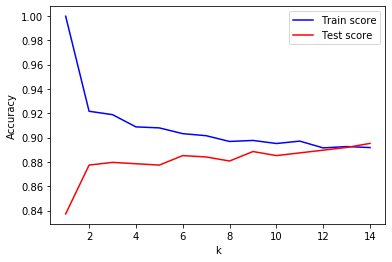

In [46]:
train_score = []
test_score = []

n = range(1,15)
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

plt.plot(n,train_score,'b',label='Train score')
plt.plot(n,test_score,'r',label = 'Test score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

It seems like k = 5 is the best parameter for KNN Model

In [47]:
knn = KNeighborsClassifier(5)
knn.fit(x_train, y_train)
print('Train score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(x_test, y_test)))

Train score: 0.9079
Test score: 0.8774


## 2. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs')
    log_l1.fit(x_train, y_train)
    log_l2.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))
    test_score_l2.append(log_l2.score(x_test, y_test))

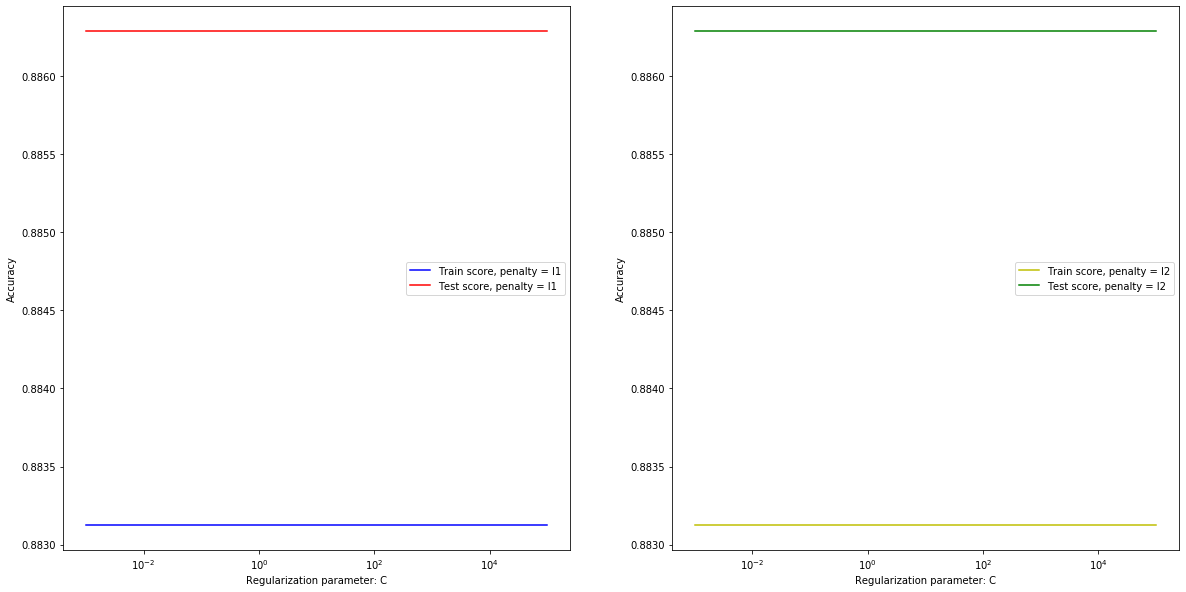

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1',c='blue')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1',c='r')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2',c='y')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2',c='g')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

L1 Regularization with C=10 gives better accuracy. With L1 penalty, the model is generalising more on the test dataset at C=10. So we choose L1 and C=10 for Logestic Regression

In [50]:
logreg = LogisticRegression(penalty='l1', C=10)
logreg.fit(x_train, y_train)
print('Train score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(logreg.score(x_test, y_test)))

Train score: 0.8831
Test score: 0.8863


In [51]:
from  sklearn.metrics import accuracy_score
y_pred = logreg.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8862876254180602


ValueError: Contour levels must be increasing

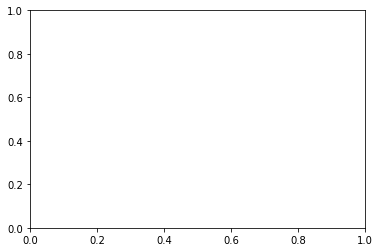

In [52]:
import mglearn
x_b = x_train[50:500, [1,2]]
y_b = y_train[50:500]

lreg = LogisticRegression(penalty = 'l1', C=100)
lreg.fit(x_b, y_b)

mglearn.plots.plot_2d_separator(lreg, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

## 3. Linear SVM Classification

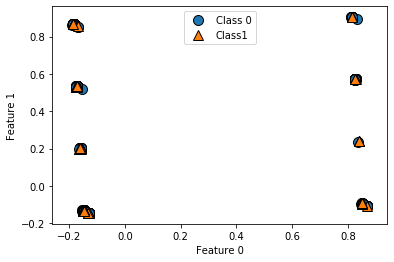

In [53]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class1'])

In [54]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=100)
linear_svm.fit(x_train,y_train)
print('Train score: {:.4f}'.format(linear_svm.score(x_train,y_train)))
print('Test score: {:.4f}'.format(linear_svm.score(x_test,y_test)))

Train score: 0.8831
Test score: 0.8863


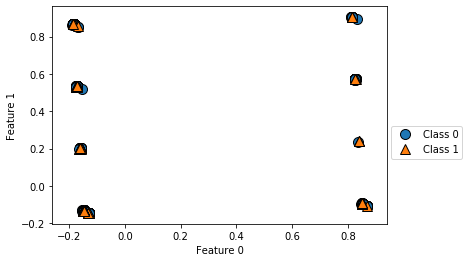

In [55]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
line = np.linspace(-5, 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1'], loc=(1.01, 0.3))

## 4. Kernelized SVM Classification

### Linear Kernel

In [56]:
#kernel = 'Linear'
C1 = [0.01,0.1,1,10]

for i in C1:
    svc = SVC(C=i,kernel='linear')
    svc.fit(x_train,y_train)
    print('C:{}'.format(i))
    print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01
Train score: 0.8831,Test score: 0.8863
C:0.1
Train score: 0.8831,Test score: 0.8863
C:1
Train score: 0.8831,Test score: 0.8863
C:10
Train score: 0.8831,Test score: 0.8863


Best Parameter: C=10

In [57]:
svc_lin = SVC(C=10,kernel='linear')
svc_lin.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_lin.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_lin.score(x_test, y_test)))

Train score: 0.8831
Test score: 0.8863


### RBF Kernel

In [58]:
#kernal = 'rbf'
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='rbf',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:0.01,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:0.01,gamma:1
Train score: 0.8831,Test score: 0.8863
C:0.01,gamma:10
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:1
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:10
Train score: 0.8901,Test score: 0.8907
C:1,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:1,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:1,gamma:1
Train score: 0.8831,Test score: 0.8863
C:1,gamma:10
Train score: 0.8918,Test score: 0.8941
C:10,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:10,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:10,gamma:1
Train score: 0.8909,Test score: 0.8919
C:10,gamma:10
Train score: 0.8921,Test score: 0.8930


Best Parameter Values: C = 10, gamma = 10

In [59]:
svc_rbf = SVC(C=10,kernel='rbf',gamma = 10)
svc_rbf.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_rbf.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_rbf.score(x_test, y_test)))

Train score: 0.8921
Test score: 0.8930


### Polynomial Kernel

In [60]:
#kernal = poly
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='poly',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:0.01,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:0.01,gamma:1
Train score: 0.8831,Test score: 0.8863
C:0.01,gamma:10
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:1
Train score: 0.8831,Test score: 0.8863
C:0.1,gamma:10
Train score: 0.8834,Test score: 0.8863
C:1,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:1,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:1,gamma:1
Train score: 0.8831,Test score: 0.8863
C:1,gamma:10
Train score: 0.8834,Test score: 0.8863
C:10,gamma:0.01
Train score: 0.8831,Test score: 0.8863
C:10,gamma:0.1
Train score: 0.8831,Test score: 0.8863
C:10,gamma:1
Train score: 0.8831,Test score: 0.8863
C:10,gamma:10
Train score: 0.8834,Test score: 0.8863


Best Parameter Values: C = 1, gamma = 10

In [61]:
svc_poly = SVC(C=1, kernel='poly', gamma=10)
svc_poly.fit(x_train,y_train)
print('Train score: {:.4f}'.format(svc_poly.score(x_train, y_train)))
print('Test score: {:.4f}'.format(svc_poly.score(x_test, y_test)))

Train score: 0.8834
Test score: 0.8863


## Decision Tree

In [62]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.8960
Accuracy on test set: 0.8829


## Comparision of Models Before and After PCA

### Before PCA

In [66]:
Classification = {'Models before PCA':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - linear','SVC - rbf','SVC - poly','Decision Tree'],'Avg.Train Score':[0.9085,0.8893,0.8832,0.8832,0.9001,0.8835,0.903],'Avg_Test_Score':[0.8948,0.8879,0.8825,0.8825,0.8934,0.8830,0.897]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Models before PCA,Avg.Train Score,Avg_Test_Score
0,KNN classification,0.9085,0.8948
1,Logistic Regrerssion,0.8893,0.8879
2,Linear SVM,0.8832,0.8825
3,SVC - linear,0.8832,0.8825
4,SVC - rbf,0.9001,0.8934
5,SVC - poly,0.8835,0.8830
6,Decision Tree,0.9030,0.8970


From the above information we conclude Logistic Regeression with L1 penalty and C=100 is our best classification model

### After PCA

In [67]:
Classification = {'Models after PCA':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - linear','SVC - rbf','SVC - poly','Decision Tree'],'Avg.Train Score':[0.9079,0.8831,0.8831,0.8831,0.8921,0.8834,0.8960],'Avg_Test_Score':[0.8774,0.8863,0.8863,0.8863,0.8921,0.8863,0.8829]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Models after PCA,Avg.Train Score,Avg_Test_Score
0,KNN classification,0.9079,0.8774
1,Logistic Regrerssion,0.8831,0.8863
2,Linear SVM,0.8831,0.8863
3,SVC - linear,0.8831,0.8863
4,SVC - rbf,0.8921,0.8921
5,SVC - poly,0.8834,0.8863
6,Decision Tree,0.8960,0.8829


After performing PCA, From the above information we conclude KNN Classification with k=5 is our best classification model

#### Before PCA, the models had high accuracies for both test and train. After dimesionality reduction by PCA, there is some loss of information, which resulted in a reduction of the train and test accuracies. So now we have a more genralized model compared to before as we are not considering the components which are not contributing to that much variance (can be considered as noise).

# Deep Learning Models

## 1. Perceptron

In [68]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [69]:
x = data.drop('y',axis=1)
y = data['y']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [73]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 6, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

In [74]:
#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [75]:
#step 3: train the model - fit
model1.fit(x_train, y_train, epochs = 50, batch_size = 300)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
3585/3585 [==============================] - 0s 128us/sample - loss: 0.6319 - acc: 0.7467
Epoch 2/50
3585/3585 [==============================] - 0s 5us/sample - loss: 0.6079 - acc: 0.8820
Epoch 3/50
3585/3585 [==============================] - 0s 4us/sample - loss: 0.5849 - acc: 0.8831
Epoch 4/50
3585/3585 [==============================] - 0s 4us/sample - loss: 0.5629 - acc: 0.8831
Epoch 5/50
3585/3585 [==============================] - 0s 3us/sample - loss: 0.5422 - acc: 0.8831
Epoch 6/50
3585/3585 [==============================] - 0s 4us/sample - loss: 0.5235 - acc: 0.8831
Epoch 7/50
3585/3585 [==============================] - 0s 4us/sample - loss: 0.5063 - acc: 0.8831
Epoch 8/50
3585/3585 [==============================] - 0s 4us/sample - loss: 0.4900 - acc: 0.8831
Epoch 9/50
3585/3585 [==============================] - 0s 4us/sample - loss: 0.4751 - acc: 0.8831
Epoch 10/50
3585/3585 [==============================] - 0s

In [76]:
#step 4: evaluation
loss_and_metrics = model1.evaluate(x_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

897/897 [==============================] - 0s 450us/sample - loss: 0.3200 - acc: 0.8852
Test Loss 0.3199628197993988
Test Accuracy 0.8851728


## 2. MLP

In [80]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 6, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [81]:
#step 2: compile the model
model2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [82]:
#step 3: train the model
model2.fit(x_train, y_train, epochs = 30, batch_size = 150)

Epoch 1/30
3585/3585 [==============================] - 0s 54us/sample - loss: 0.6774 - acc: 0.8803
Epoch 2/30
3585/3585 [==============================] - 0s 8us/sample - loss: 0.6515 - acc: 0.8831
Epoch 3/30
3585/3585 [==============================] - 0s 9us/sample - loss: 0.6140 - acc: 0.8831
Epoch 4/30
3585/3585 [==============================] - 0s 8us/sample - loss: 0.5618 - acc: 0.8831
Epoch 5/30
3585/3585 [==============================] - 0s 7us/sample - loss: 0.5002 - acc: 0.8831
Epoch 6/30
3585/3585 [==============================] - 0s 8us/sample - loss: 0.4420 - acc: 0.8831
Epoch 7/30
3585/3585 [==============================] - 0s 8us/sample - loss: 0.4020 - acc: 0.8831
Epoch 8/30
3585/3585 [==============================] - 0s 8us/sample - loss: 0.3829 - acc: 0.8831
Epoch 9/30
3585/3585 [==============================] - 0s 8us/sample - loss: 0.3748 - acc: 0.8831
Epoch 10/30
3585/3585 [==============================] - 0s 7us/sample - loss: 0.3701 - acc: 0.8831
Epoch 11

In [83]:
#step 4: evaluate
model2.evaluate(x_test, y_test)

897/897 [==============================] - 0s 72us/sample - loss: 0.2898 - acc: 0.8863


[0.28981072126722657, 0.8862876]